# Histogram of Oriented Gradients (HoG)

I came across a simple HoG implementation while taking CS231n. I could understand how HoG works by reading the paper [1], but, as has always been the case, I needed some visualization to keep it in my memory for longer, so I wrote this notebook to help myself. Try to play with it, hope you find it useful. 

For more details kindly check other sources; for example, [1], [HoG Wiki](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients), [MIT hoggles](http://web.mit.edu/vondrick/ihog/), and [HOG Tutorial](https://chrisjmccormick.wordpress.com/2013/05/09/hog-person-detector-tutorial/).

**Wiki excerpt**: The essential thought behind the histogram of oriented gradients (HoG) descriptor is that local object appearance and shape within an image can be described by the distribution of intensity gradients or edge directions. The image is divided into small connected regions called cells, and for the pixels within each cell, a histogram of gradient directions is compiled. The descriptor is then the concatenation of these histograms. For improved accuracy, the local histograms can be contrast-normalized by calculating a measure of the intensity across a larger region of the image, called a block, and then using this value to normalize all cells within the block. This normalization results in better invariance to changes in illumination and shadowing.

The HOG descriptor has a few key advantages over other descriptors. Since it operates on local cells, it is invariant to geometric and photometric transformations, except for object orientation. Such changes would only appear in larger spatial regions. Moreover, as Dalal and Triggs discovered, coarse spatial sampling, fine orientation sampling, and strong local photometric normalization permits the individual body movement of pedestrians to be ignored so long as they maintain a roughly upright position. The HOG descriptor is thus particularly suited for human detection in images.[1]

With sufficiently large amount of training images, HoG feature descriptors could be used to train a classifier (SVM) to detect or classify image regions. These kind of hand-crafted feature detectors are usually categorized into traditional detectors, because current trend is to learn features end to end in unsupervised manner. Also, we are seeing great results on state of the art challenges with end to end feature learning. 

Next, I will walk you through visualization of HoG implementation. 

In [116]:
# Import libraries
from scipy.misc import imread, imresize
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [117]:
def rgb2gray(rgb):
  """Convert RGB image to grayscale

    Parameters:
      rgb : RGB image

    Returns:
      gray : grayscale image
  
  """
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [149]:
# image read
image=imread('./golden_gate_bridge2_Fotor.jpg')

## 1. Let's display the original image

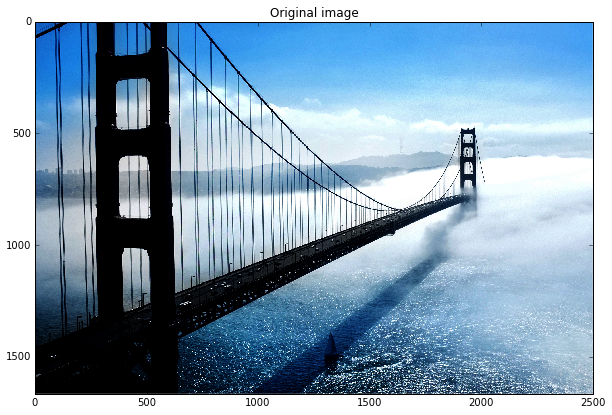

In [150]:
plt.gcf().set_size_inches(10, 8)
plt.title('Original image')
plt.imshow(image)

## 2. Convert to grayscale

In [151]:
image_gray = rgb2gray(image)

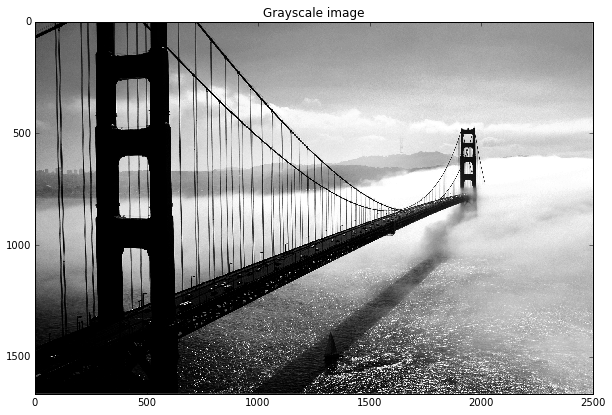

In [152]:
plt.gcf().set_size_inches(10, 8)
plt.title('Grayscale image')
plt.imshow(image_gray, cmap="gray")

## 3. Gradients along x and y direction 

In [264]:
gx = np.zeros(image_gray.shape)
gy = np.zeros(image_gray.shape)
gx[:, :-1] = np.diff(image_gray, n=1, axis=1) # compute gradient on x-direction
gy[:-1, :] = np.diff(image_gray, n=1, axis=0) # compute gradient on y-direction

In [265]:
print "gradient x min=%f, max=%f"%(gx.min(), gx.max())
print "gradient y min=%f, max=%f"%(gy.min(), gy.max())

gradient x min=-251.530000, max=243.589000
gradient y min=-254.421000, max=247.798000


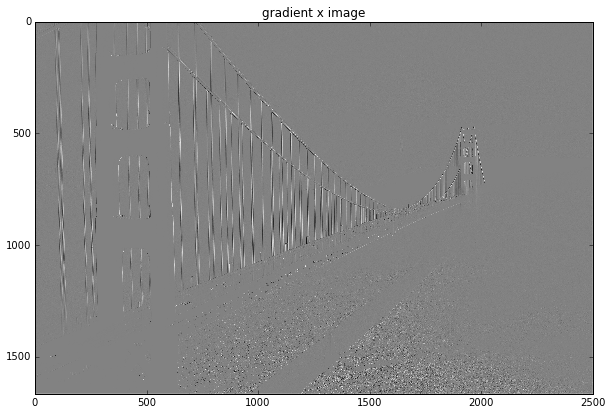

In [266]:
plt.gcf().set_size_inches(10, 8)
plt.title('gradient x image')
plt.imshow(gx, cmap="gray")

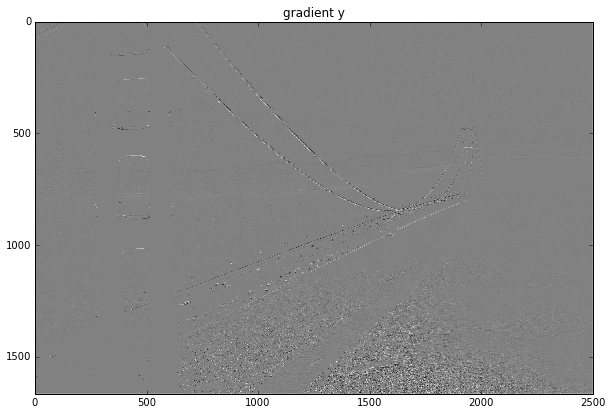

In [267]:
plt.gcf().set_size_inches(10, 8)
plt.title('gradient y')
plt.imshow(gy, cmap="gray")

## 4. Gradient magnitudes and orientations

In [289]:
grad_mag = np.sqrt(gx ** 2 + gy ** 2) # gradient magnitude
grad_ori = np.arctan2(gy, (gx + 1e-15)) * (180 / np.pi) + 90 # gradient orientation
print grad_ori.shape
print grad_mag.shape

(1667, 2500)
(1667, 2500)


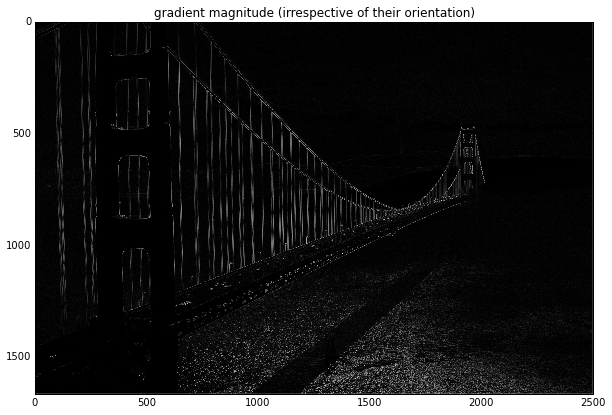

In [269]:
plt.gcf().set_size_inches(10, 8)
plt.title('gradient magnitude (irrespective of their orientation)')
plt.imshow(grad_mag, cmap="gray")

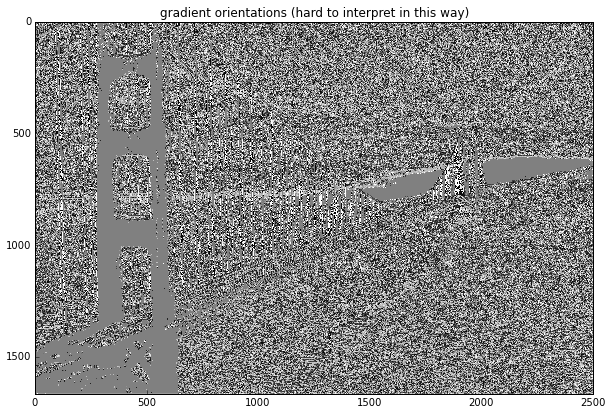

In [159]:
plt.gcf().set_size_inches(10, 8)
plt.title('gradient orientations (hard to interpret in this way)')
plt.imshow(255.0 * (grad_ori - grad_ori.min())/(grad_ori.max() - grad_ori.min()), cmap="gray")

### A. Let's visualize gradients which are orientated from 0 to 20 degrees

In [170]:
orientations = 9

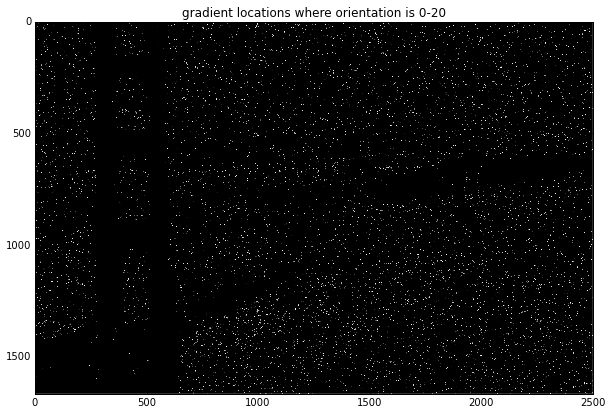

In [171]:
i = 0
temp_ori = np.where(grad_ori < 180 / orientations * (i + 1),
                        grad_ori, 0)

temp_ori = np.where(grad_ori >= 180 / orientations * i,
                        temp_ori, 0)

plt.gcf().set_size_inches(10, 8)
plt.title('gradient locations where orientation is 0-20')
plt.imshow(temp_ori, cmap="gray")

### Plot the gradient magnitude for these gradients

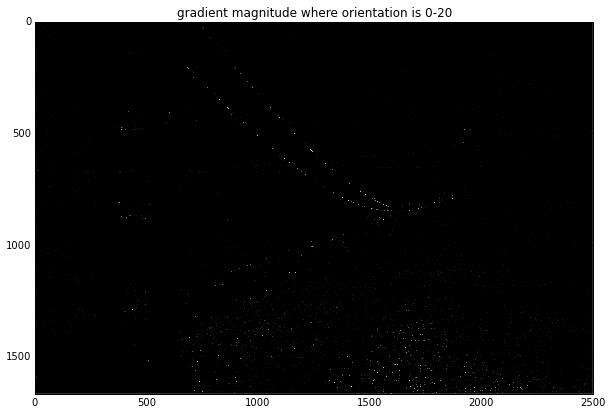

In [172]:
temp_mag = np.where(temp_ori > 0, grad_mag, 0)

plt.gcf().set_size_inches(10, 8)
plt.title('gradient magnitude where orientation is 0-20')
plt.imshow(temp_mag, cmap="gray")

The reason we see more horizontal lines is because all of the gradients that we filtered have orientation in the range of 0-20 degrees. 

### B. One interesting question to ask: Why is does the gradient magnitude plot look much cleaner compared to the orientations we plotted earlier?

Let's visualize what grayscale looks like:

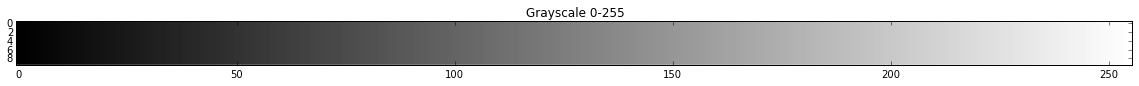

In [173]:
grayscale_stretchy = np.vstack([np.arange(256)]*10)
plt.gcf().set_size_inches(20, 20)
plt.title('Grayscale 0-255')
plt.imshow(grayscale_stretchy, cmap="gray")

Each column represents a single grayscale shade corresponding to pixel values 0-255.

Now, let's plot a single line from the gradient magnitude image to understand what's going on. 
Row 290 (which includes bridge girder) seems a good candidate for evaluation: 

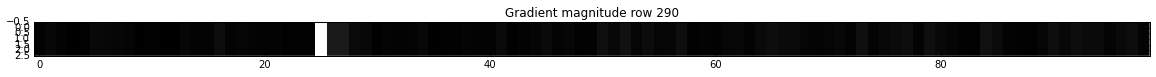

In [174]:
temp_mag_stretchy = np.vstack([temp_mag[290][temp_mag[290]> 0], temp_mag[290][temp_mag[290]> 0], temp_mag[290][temp_mag[290]> 0]])
plt.gcf().set_size_inches(20, 20)
plt.title('Gradient magnitude row 290')
plt.imshow(temp_mag_stretchy, cmap="gray")

Let's re-plot the same row of gradient orientations

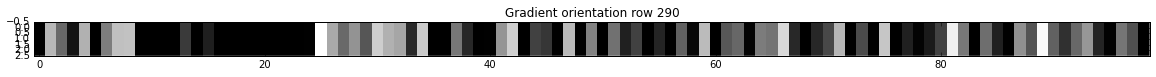

In [175]:
temp_ori_stretchy = np.vstack([temp_ori[290][temp_ori[290]> 0], temp_ori[290][temp_ori[290]> 0], temp_ori[290][temp_ori[290]> 0]])
plt.gcf().set_size_inches(20, 20)
plt.title('Gradient orientation row 290')
plt.imshow(temp_ori_stretchy, cmap="gray")

Now it's much more clear. We only see magitudes which are large enough to produce shades that can be identified by our eye. E.g, as it can be seen on the grayscale, we can hardly tell the difference among pixel values ranging from 0 to 25. That's explains why we see much cleaner magnitude image. 

### C. Let's visualize gradients which are orientated from 80 to 100 degrees
It's similar exercise as before. 

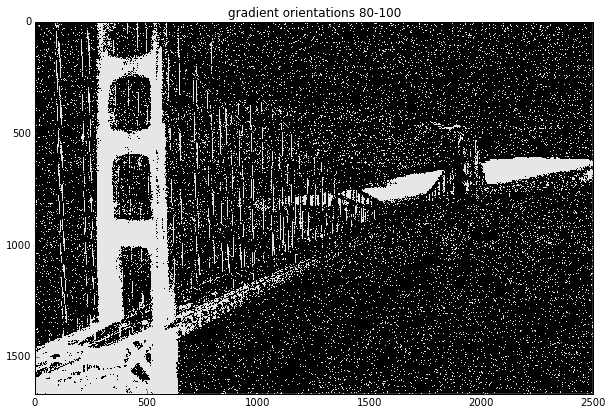

In [176]:
i = 4
temp_ori = np.where(grad_ori < 180 / orientations * (i + 1),
                        grad_ori, 0)

temp_ori = np.where(grad_ori >= 180 / orientations * i,
                        temp_ori, 0)

plt.gcf().set_size_inches(10, 8)
plt.title('gradient orientations 80-100')
plt.imshow(temp_ori, cmap="gray")

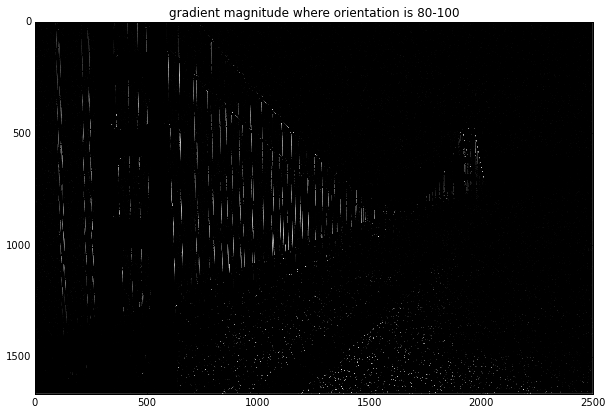

In [177]:
temp_mag = np.where(temp_ori > 0, grad_mag, 0)

plt.gcf().set_size_inches(10, 8)
plt.title('gradient magnitude where orientation is 80-100')
plt.imshow(temp_mag, cmap="gray")

Try to compare this result with gradient magnitude plot for orientation 0-20

### D. Side tutorial: visualizing effects of a uniform spatial filter

In [178]:
from scipy.ndimage import uniform_filter

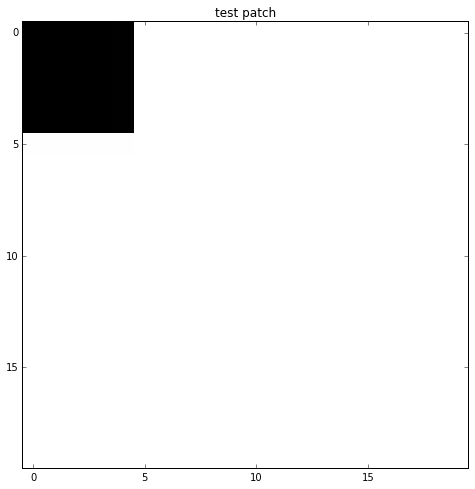

In [179]:
test=np.ones((20,20))*255

test[:5,:5] = 0
plt.title('test patch')

plt.gcf().set_size_inches(8, 8)
plt.rcParams['image.interpolation'] = 'none'
plt.imshow(test, cmap="gray")

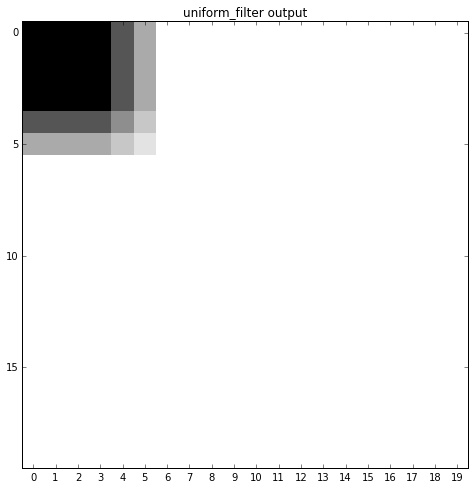

In [180]:
plt.title('uniform_filter output')
plt.gcf().set_size_inches(8, 8)
plt.xticks(range(20))
plt.rcParams['image.interpolation'] = 'none'
plt.imshow(uniform_filter(test, size=(3,3)), cmap="gray")

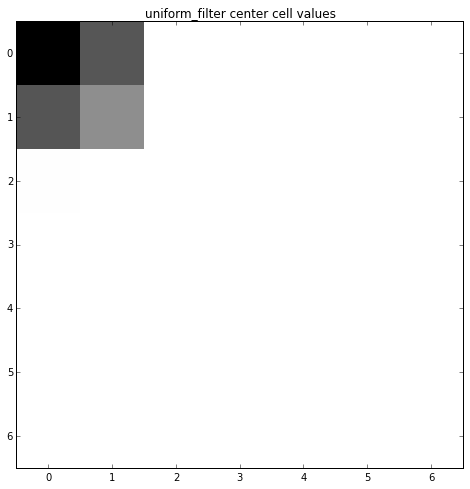

In [181]:
plt.title('uniform_filter center cell values')
plt.gcf().set_size_inches(8, 8)
#plt.xticks(range(10))
plt.imshow(uniform_filter(test, size=(3,3))[3/2::3, 3/2::3], cmap="gray")

## 5. Histogram of gradients (HoG)

In [182]:
# HoG parameters
sx, sy = image_gray.shape # image size
orientations = 9 # number of gradient bins
cx, cy = (8, 8) # pixels per cell
print "image shape=(%dx%d)"%(sx,sy)

image shape=(1667x2500)


In [183]:
# We take the small windows of size (n_cellsx, n_cellsy), 
# and measure kind(orientation) and magnitude of gradients present in that window
n_cellsx = int(np.floor(sx / cx))  # number of cells in x
n_cellsy = int(np.floor(sy / cy))  # number of cells in y
orientation_histogram = np.zeros((n_cellsx, n_cellsy, orientations))

### Histogram of 80-100 orientated gradients

In [184]:
orientation_histogram[:,:,8] = uniform_filter(temp_mag, size=(cx, cy))[cx/2::cx, cy/2::cy]

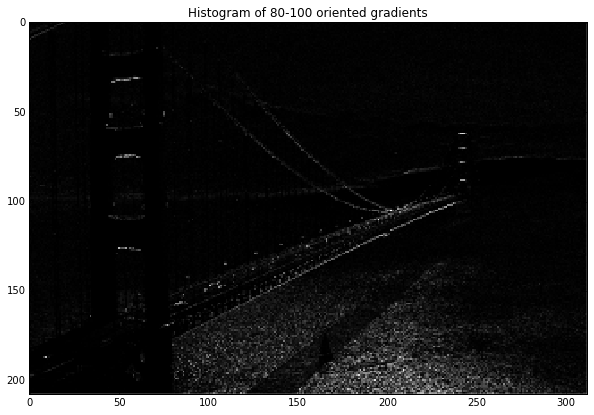

In [270]:
plt.gcf().set_size_inches(10, 8)
plt.title('Histogram of 80-100 oriented gradients')
plt.imshow(orientation_histogram[:,:,8], cmap="gray")

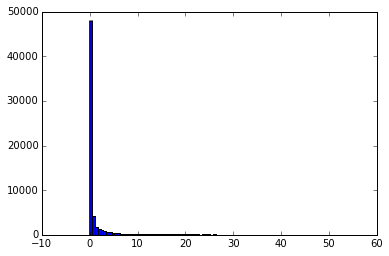

In [186]:
hog_desc_9  = orientation_histogram[:,:,8].ravel()
hog_desc_9.shape
_ = plt.hist(hog_desc_9, bins=100)

### Full HoG

In [262]:
for i in range(orientations):
    # create new integral image for this orientation
    # isolate orientations in this range
    temp_ori = np.where(grad_ori < 180 / orientations * (i + 1),
                        grad_ori, 0)
    temp_ori = np.where(grad_ori >= 180 / orientations * i,
                        temp_ori, 0)
    # select magnitudes for those orientations
    temp_mag = np.where(temp_ori, grad_mag, 0)
    orientation_histogram[:,:,i] = uniform_filter(temp_mag, size=(cx, cy))[cx/2::cx, cy/2::cy]

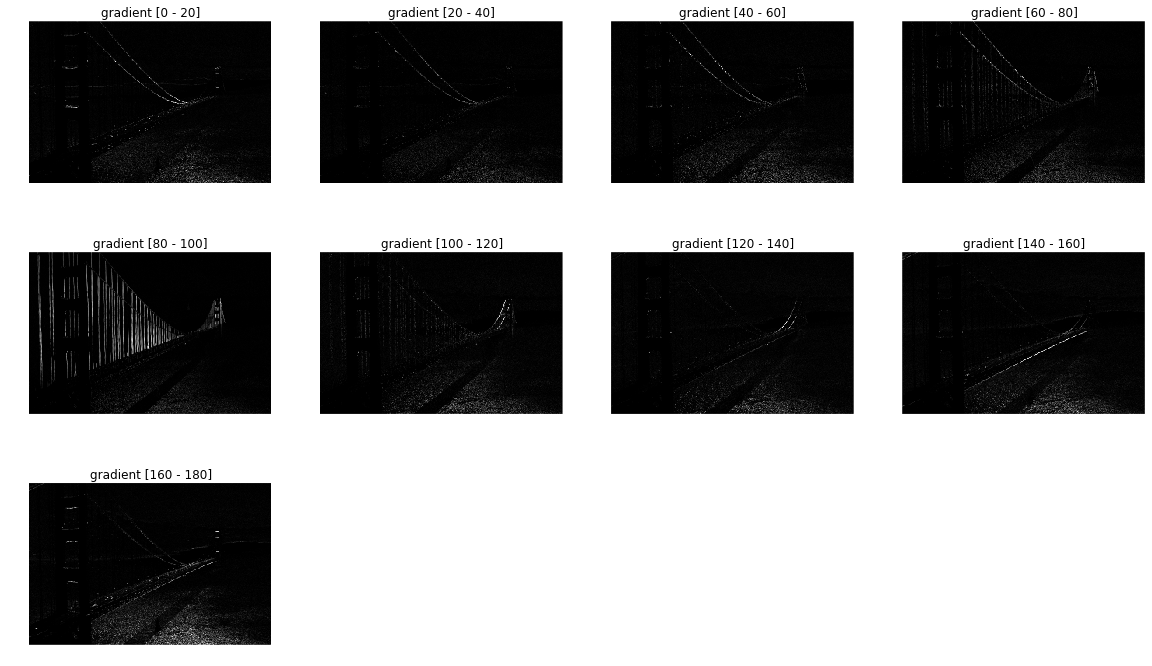

In [188]:
plt.gcf().set_size_inches(20, 20)
for i in range(orientations):
    plt.subplot(orientations/2+1, orientations/2, i+1)
    plt.title('gradient [%d - %d]'%(i*20, (i+1)*20))
    
    plt.rcParams['image.interpolation'] = 'none'
    plt.imshow(orientation_histogram[:,:,i], cmap="gray")
    plt.gca().axis('off')

In [189]:
print "hist min=", np.histogram(orientation_histogram[:,:,0], bins=100)[0].min()
print "hist max=", np.histogram(orientation_histogram[:,:,0], bins=100)[0].max()

hist min= 0
hist max= 36503


In [195]:
orientation_histogram.shape

(208, 312, 9)

### Let's plot histogram

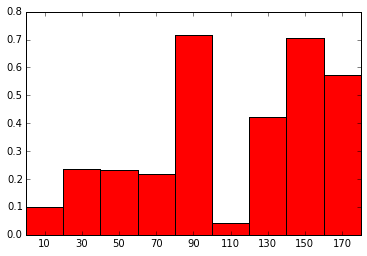

In [243]:
hog_desc  = orientation_histogram[0,0,:].ravel()
_ = plt.bar(np.arange(0,180,20), hog_desc, 20, color='r')
_ = plt.xticks(np.arange(10,180,20))

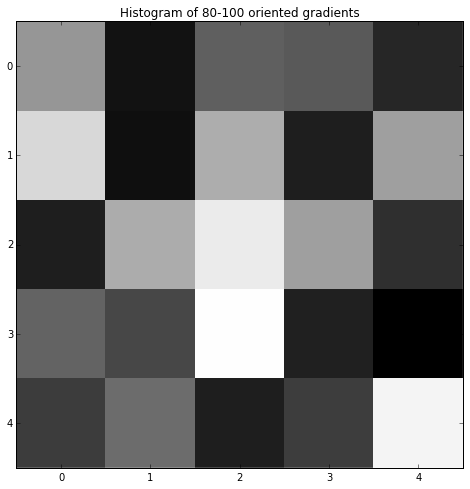

In [310]:
plt.gcf().set_size_inches(10, 8)
plt.title('Histogram of 80-100 oriented gradients')
#sample_ = np.zeros_like(grad_ori[10:120,10:120].shape + (3,))
sample_ = grad_ori[450:455, 450:455] #np.vstack([[grad_ori[450:455, 450:455]]*3]).transpose(1,2,0)
plt.imshow(sample_, cmap='gray')

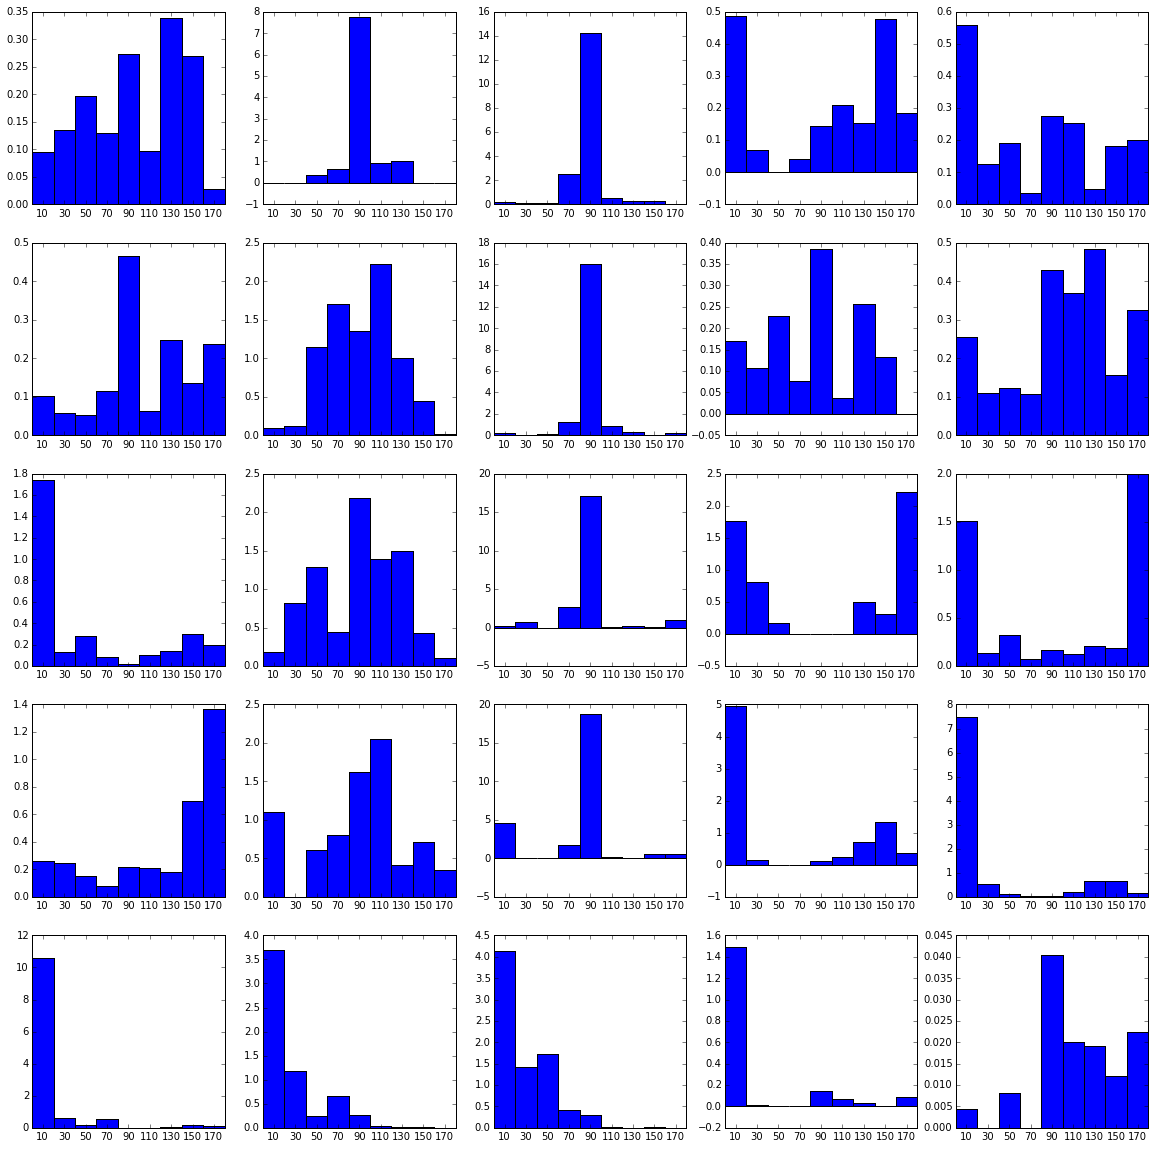

In [314]:
plt.gcf().set_size_inches(20, 20)
H, W, bins = orientation_histogram.shape

for i in range(5):
    for j in range(5):
        plt.subplot(5, 5, i*5+j+1)
        hog_desc = orientation_histogram[450/cx+i,450/cy+j].ravel()
        _ = plt.bar(np.arange(0,180,20), hog_desc, 20, color='b')
        _ = plt.xticks(np.arange(10,180,20))

### HoG descriptor

In [192]:
hog_desc=orientation_histogram.ravel()

In [193]:
hog_desc.shape

(584064,)

# References

[1] HoG implementation [CS231n](http://cs231n.stanford.edu/)

[2] N. Dalal and B. Triggs. Histograms of oriented gradients for human detection. Coference on Computer Vision and Pattern Recognition (CVPR), 2005]

[3] Sample image https://static.pexels.com/photos/6572/pexels-photo.jpeg (google images: noncommercial reuse only)

_Special thanks to Andrej Karpathy and CS231n staff_